In [10]:
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import time

import kkl.divergences as dv
import kkl.kernels as kl
import kkl.gradient_descent as gd
import kkl.generate_y as gy
import cProfile

In [46]:

##############################
######## PARAMETERS ##########
##############################

n = 100 # nombre de particules pour p
m = 100 # nombre de particules pour q
T = 400 # nombre d'itérations
h = 0.004 # stepsize gradient descent
eps = 0.0001
alpha = 0.01

### KERNEL ###
sigma = 0.15 
k = lambda x,y :  kl.k_gauss(x,y,sigma)
dk = lambda x,y : kl.dk_gauss(x,y,sigma)


#### DIVERGENCE ####
J = lambda x : dv.KKL(x, y, k, Packy, alpha) 
dJ = lambda x : dv.WGrad_KKL(x, y, k, dk, Packy, alpha, sigma) 

# 2 gaussians with different weights

In [105]:
##############################
######## PARAMETERS ##########
##############################

n = 250 # nombre de particules pour p
m = 250 # nombre de particules pour q
T = 100 # nombre d'itérations
h = 2 # stepsize gradient descent
eps = 0.0001
alpha = 0.01

### KERNEL ###
sigma = 5
k = lambda x,y :  kl.k_gauss(x,y,sigma)
dk = lambda x,y : kl.dk_gauss(x,y,sigma)


#### DIVERGENCE ####
J = lambda x : dv.KKL(x, y, k, Packy, alpha) 
dJ = lambda x : dv.WGrad_KKL(x, y, k, dk, Packy, alpha, sigma) 

In [106]:
####### INITIAL DISTRIBUTIONS P AND Q  ########


x0 = gy.gaussian(gy.mux,np.identity(2),n)
y = gy.mixt_gauss(gy.MU,[np.identity(2),np.identity(2)],[1/4,3/4],m)


#### Matrice Ky, eigenvalues and eigenvectors ####
Ky = 1/m * k(y,y) #1/m * np.array([[k(y[i],y[j],sigm(x0,y)) for i in range(m)] for j in range(m)])
Ly,V = np.linalg.eig(Ky)
V = V.transpose()
Ly = np.real(Ly)
Packy = [Ky,Ly,V]

###########################################
############ GRADIENT DESCENT #############
###########################################

t0 = time.time()
X,l_J,Grad = gd.gradient_descent(J, dJ, x0, h, eps, T)
print(time.time()-t0)

T = 0
T = 10
T = 20
T = 30
T = 40
T = 50
T = 60
T = 70
T = 80
T = 90
134.0937464237213


Text(0.5, 1.0, 'Values of the gradient of $KKL_{\\alpha}')

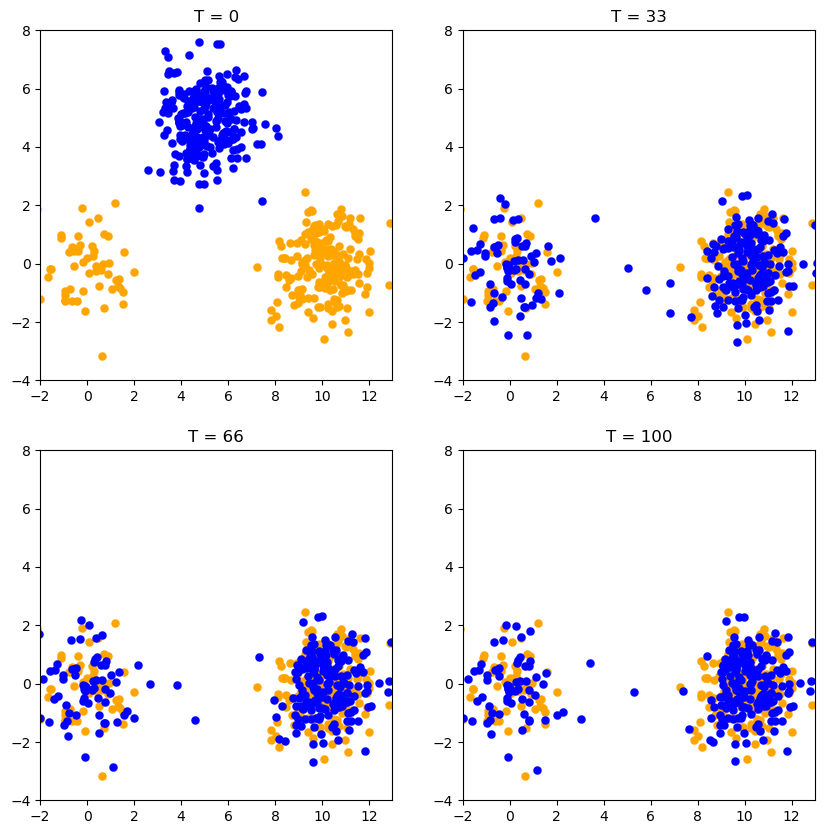

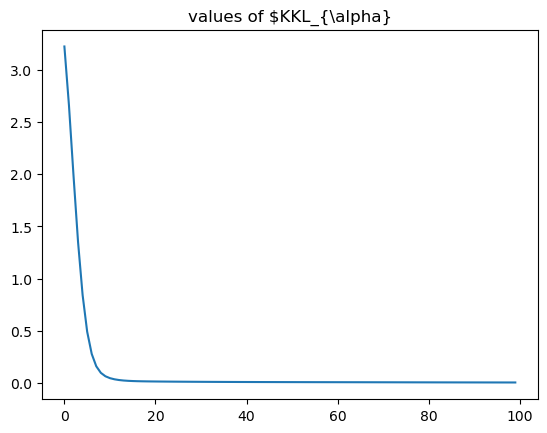

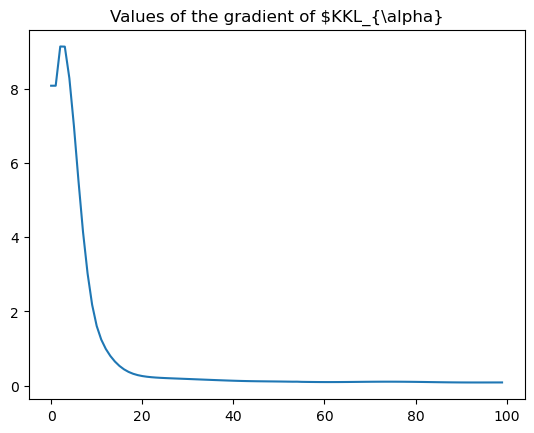

In [107]:
############################
########## PLOTS ###########
############################


fig, axs = plt.subplots(2, 2, figsize=(10,10))
for i in range(4):
    t = i * (T) // 3
    axs[i//2,i%2].axis([-2,13,-4,8])
    axs[i//2,i%2].scatter(y[:,0],y[:,1],color = "orange",linewidth = 0.1)
    axs[i//2,i%2].scatter(X[t,:,0], X[t,:,1], color = "blue",linewidth=0.1)
    axs[i//2,i%2].set_title("T = " + str(t))


plt.figure()    
plt.plot(l_J)

plt.title(r"values of $KKL_{\alpha}")

plt.figure()
plt.plot(Grad)
plt.title(r"Values of the gradient of $KKL_{\alpha}")

# Etoile

In [47]:
####### INITIAL DISTRIBUTIONS P AND Q  ########


x0= scs.multivariate_normal.rvs(0.5 * np.array([np.cos(-3 * np.pi/4),np.sin(-3* np.pi/4)]),0.01 * np.identity(2),n)
y = gy.shape("images/etoile.jpg",m)


#### Matrice Ky, eigenvalues and eigenvectors ####
Ky = 1/m * k(y,y) #1/m * np.array([[k(y[i],y[j],sigm(x0,y)) for i in range(m)] for j in range(m)])
Ly,V = np.linalg.eig(Ky)
V = V.transpose()
Ly = np.real(Ly)
Packy = [Ky,Ly,V]

###########################################
############ GRADIENT DESCENT #############
###########################################

t0 = time.time()
X,l_J,Grad = gd.gradient_descent(J, dJ, x0, h, eps, T)
print(time.time()-t0)
#cProfile.run('gd.gradient_descent(J, dJ, x0, h, eps, T)')

T = 0
T = 10
T = 20
T = 30
T = 40
T = 50
T = 60
T = 70
T = 80
T = 90
T = 100
T = 110
T = 120
T = 130
T = 140
T = 150
T = 160
T = 170
T = 180
T = 190
T = 200
T = 210
T = 220
T = 230
T = 240
T = 250
T = 260
T = 270
T = 280
T = 290
T = 300
T = 310
T = 320
T = 330
T = 340
T = 350
T = 360
T = 370
T = 380
T = 390
127.29803419113159


Text(0.5, 1.0, 'Values of the gradient of $KKL_{\\alpha}')

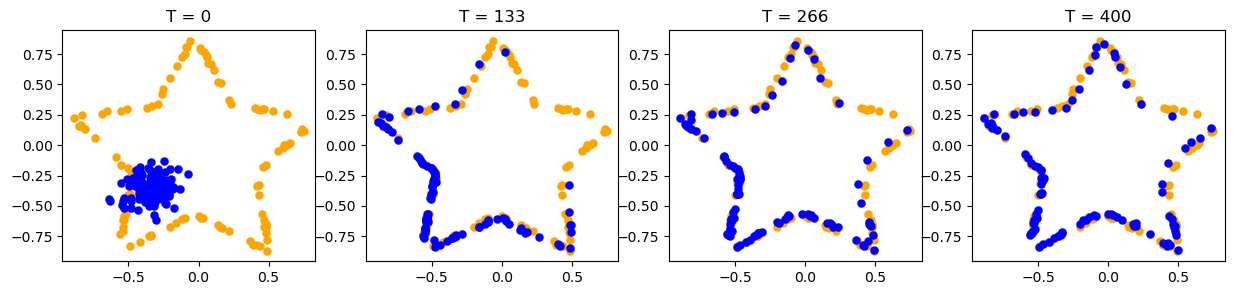

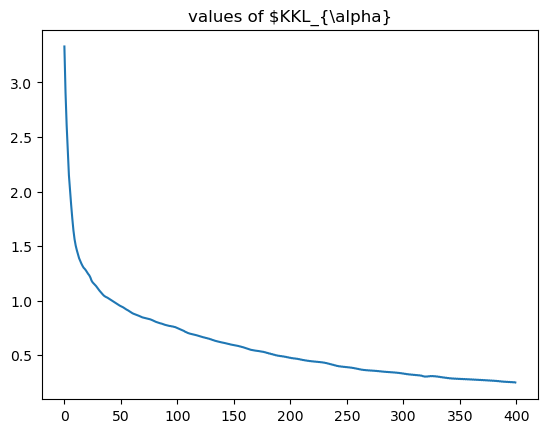

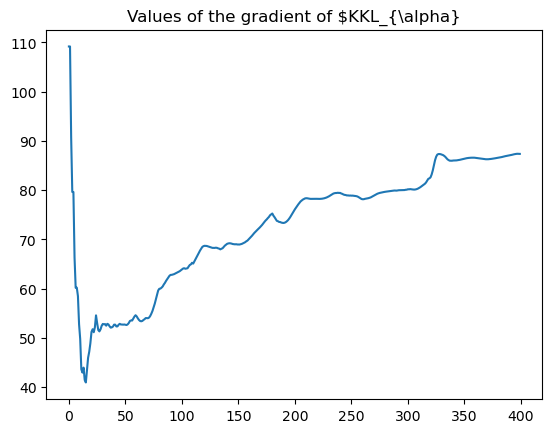

In [53]:
############################
########## PLOTS ###########
############################


fig, axs = plt.subplots(1, 4, figsize=(15,3))
for i in range(4):
    t = i * (T) // 3
    axs[i%4].scatter(y[:,0],y[:,1],color = "orange",linewidth = 0.1)
    axs[i%4].scatter(X[t,:,0], X[t,:,1], color = "blue",linewidth=0.1)
    axs[i%4].set_title("T = " + str(t))


plt.figure()    
plt.plot(l_J)

plt.title(r"values of $KKL_{\alpha}")

plt.figure()
plt.plot(Grad)
plt.title(r"Values of the gradient of $KKL_{\alpha}")

# Mixture of 8 gaussians

In [108]:
##############################
######## PARAMETERS ##########
##############################

n = 200 # nombre de particules pour p
m = 200 # nombre de particules pour q
T = 100 # nombre d'itérations
h = 0.5 # stepsize gradient descent
eps = 0.0001
alpha = 0.01

### KERNEL ###
sigma = 3
k = lambda x,y :  kl.k_gauss(x,y,sigma)
dk = lambda x,y : kl.dk_gauss(x,y,sigma)


#### DIVERGENCE ####
J = lambda x : dv.KKL(x, y, k, Packy, alpha) 
dJ = lambda x : dv.WGrad_KKL(x, y, k, dk, Packy, alpha, sigma) 

In [109]:
####### INITIAL DISTRIBUTIONS P AND Q  ########


x0= scs.multivariate_normal.rvs(0.5 * np.array([np.cos(-3 * np.pi/4),np.sin(-3* np.pi/4)]),0.01 * np.identity(2),n)
y = gy.othershapes("8gaussians", m)


#### Matrice Ky, eigenvalues and eigenvectors ####
Ky = 1/m * k(y,y) #1/m * np.array([[k(y[i],y[j],sigm(x0,y)) for i in range(m)] for j in range(m)])
Ly,V = np.linalg.eig(Ky)
V = V.transpose()
Ly = np.real(Ly)
Packy = [Ky,Ly,V]

###########################################
############ GRADIENT DESCENT #############
###########################################

t0 = time.time()
X,l_J,Grad = gd.gradient_descent(J, dJ, x0, h, eps, T)
print(time.time()-t0)

T = 0
T = 10
T = 20
T = 30
T = 40
T = 50
T = 60
T = 70
T = 80
T = 90
73.55401086807251


Text(0.5, 1.0, 'Values of the gradient of $KKL_{\\alpha}')

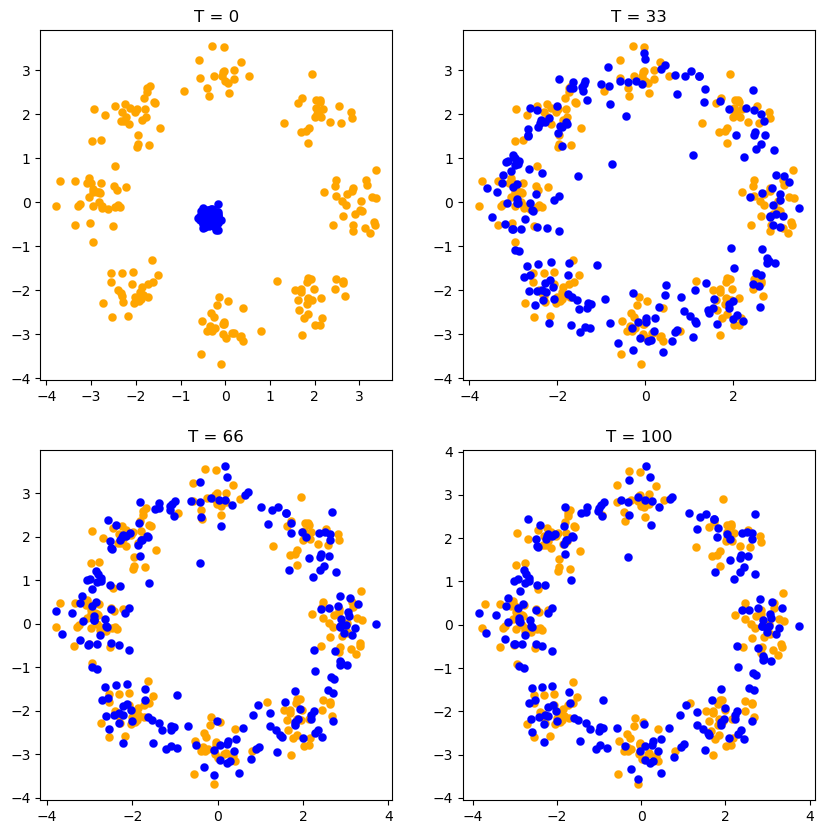

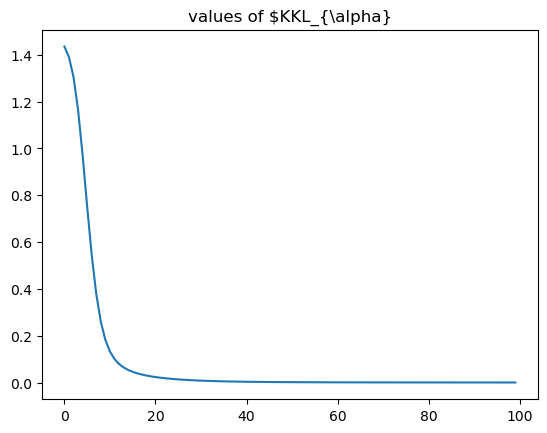

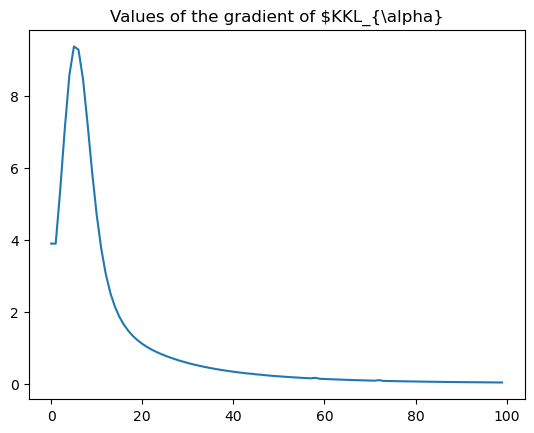

In [110]:
############################
########## PLOTS ###########
############################


fig, axs = plt.subplots(2, 2, figsize=(10,10))
for i in range(4):
    t = i * (T) // 3
    axs[i//2,i%2].scatter(y[:,0],y[:,1],color = "orange",linewidth = 0.1)
    axs[i//2,i%2].scatter(X[t,:,0], X[t,:,1], color = "blue",linewidth=0.1)
    axs[i//2,i%2].set_title("T = " + str(t))


plt.figure()    
plt.plot(l_J)

plt.title(r"values of $KKL_{\alpha}")

plt.figure()
plt.plot(Grad)
plt.title(r"Values of the gradient of $KKL_{\alpha}")

# Heart to star

In [129]:
##############################
######## PARAMETERS ##########
##############################

n = 100 # nombre de particules pour p
m = 100 # nombre de particules pour q
T = 100 # nombre d'itérations
h = 0.002 # stepsize gradient descent
eps = 0.0001
alpha = 0.01

### KERNEL ###
sigma = 0.3
k = lambda x,y :  kl.k_gauss(x,y,sigma)
dk = lambda x,y : kl.dk_gauss(x,y,sigma)


#### DIVERGENCE ####
J = lambda x : dv.KKL(x, y, k, Packy, alpha) 
dJ = lambda x : dv.WGrad_KKL(x, y, k, dk, Packy, alpha, sigma) 

In [130]:
####### INITIAL DISTRIBUTIONS P AND Q  ########


x0= gy.shape("images/coeur.png",n)
y = gy.shape("images/etoile.jpg", m)


#### Matrice Ky, eigenvalues and eigenvectors ####
Ky = 1/m * k(y,y) #1/m * np.array([[k(y[i],y[j],sigm(x0,y)) for i in range(m)] for j in range(m)])
Ly,V = np.linalg.eig(Ky)
V = V.transpose()
Ly = np.real(Ly)
Packy = [Ky,Ly,V]

###########################################
############ GRADIENT DESCENT #############
###########################################

t0 = time.time()
X,l_J,Grad = gd.gradient_descent(J, dJ, x0, h, eps, T)
print(time.time()-t0)

T = 0
T = 10
T = 20
T = 30
T = 40
T = 50
T = 60
T = 70
T = 80
T = 90
9.804550647735596


Text(0.5, 1.0, 'Values of the gradient of $KKL_{\\alpha}')

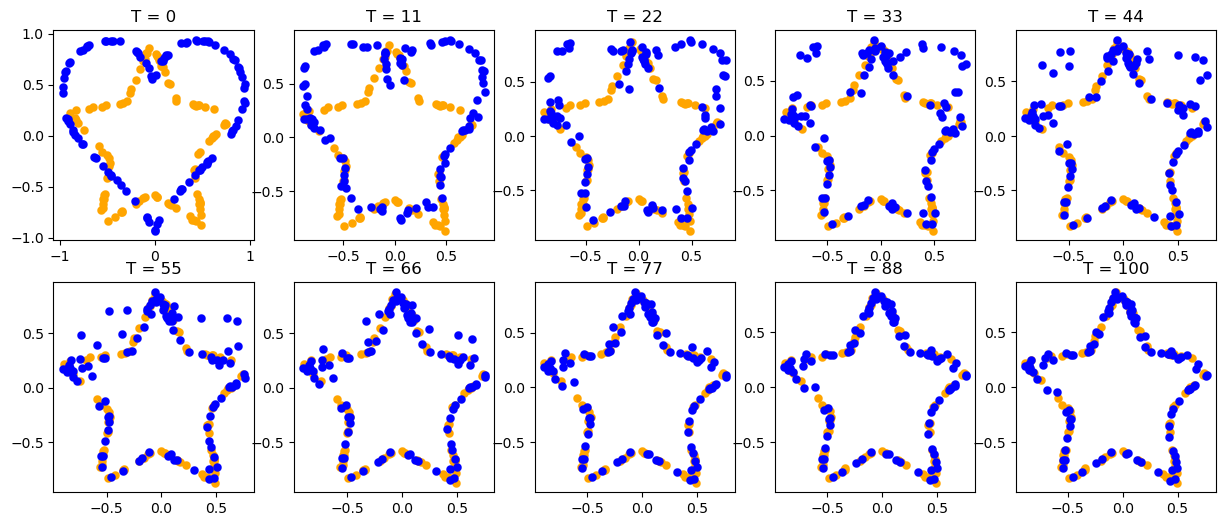

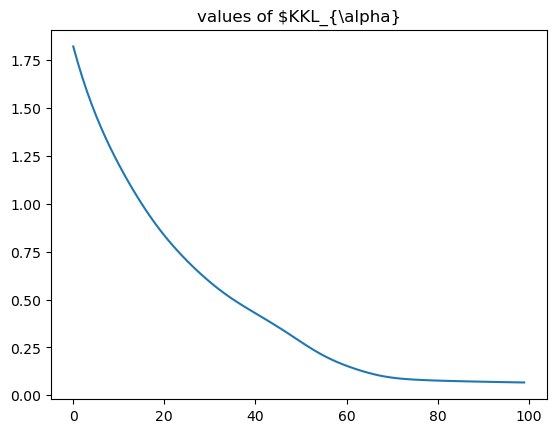

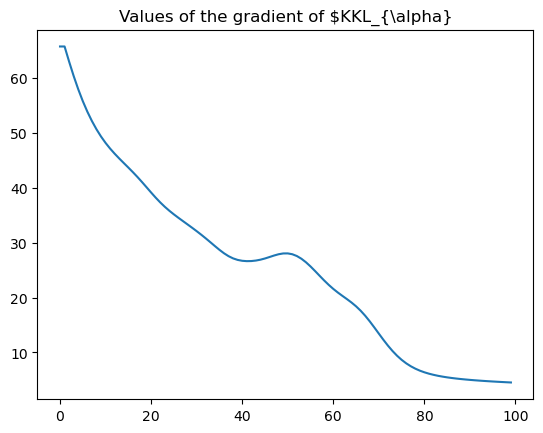

In [136]:
############################
########## PLOTS ###########
############################


fig, axs = plt.subplots(2,5, figsize=(15,6))
for i in range(10):
    t = i * (T) // 9
    axs[i//5,i%5].scatter(y[:,0],y[:,1],color = "orange",linewidth = 0.1)
    axs[i//5,i%5].scatter(X[t,:,0], X[t,:,1], color = "blue",linewidth=0.1)
    axs[i//5,i%5].set_title("T = " + str(t))


plt.figure()    
plt.plot(l_J)

plt.title(r"values of $KKL_{\alpha}")

plt.figure()
plt.plot(Grad)
plt.title(r"Values of the gradient of $KKL_{\alpha}")